## Applying Multiple Linear Regression on DATASET

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
dataset = pd.read_csv("../Datasets/Week-6/Student_Performance.csv").drop(columns=["Extracurricular Activities"])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [4]:
coefficients = model.coef_
print("Coefficients (Beta matrix):", coefficients)

Coefficients (Beta matrix): [2.85342921 1.01858354 0.47633298 0.1951983 ]


## Multiple Linear Regression from scratch using Batch Gradient Descent algorithm

1. Import Modules

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2. Train-Test Split the Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones to include the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

3. Define Batch Gradient Descent Function

In [14]:
def batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

4. Set Learning Rate and Epochs

In [12]:
learning_rate = 0.01
epochs = 1000
theta = batch_gradient_descent(X_train, y_train, learning_rate, epochs)

print("Optimized Coefficients (Beta matrix):", theta)

Optimized Coefficients (Beta matrix): [55.31149991  7.40240352 17.63809529  0.80387754  0.54854089]


## Compare the outcomes of both methods.

In [15]:
from sklearn.metrics import mean_squared_error

# Predictions using the sklearn model
y_pred_sklearn = model.predict(X_test[:, 1:])  

# Predictions using the gradient descent model
y_pred_gd = X_test.dot(theta)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mse_gd = mean_squared_error(y_test, y_pred_gd)

print("MSE (sklearn):", mse_sklearn)
print("MSE (Gradient Descent):", mse_gd)

MSE (sklearn): 8159.9423252344595
MSE (Gradient Descent): 4.182254908143934


## Stochastic gradient descent and mini-batch (batch size = 32) gradient descent on the above dataset

In [16]:
# Stochastic Gradient Descent algorithm
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Mini-Batch Gradient Descent algorithm
def mini_batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = (2/len(xi)) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

theta_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate, epochs)
theta_mbgd = mini_batch_gradient_descent(X_train, y_train, learning_rate, epochs, batch_size=32)

print("Optimized Coefficients (SGD):", theta_sgd)
print("Optimized Coefficients (MBGD):", theta_mbgd)

y_pred_sgd = X_test.dot(theta_sgd)

y_pred_mbgd = X_test.dot(theta_mbgd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)

print("MSE (SGD):", mse_sgd)
print("MSE (MBGD):", mse_mbgd)

Optimized Coefficients (SGD): [55.49543851  7.32487847 17.56103902  1.04311832  0.73528793]
Optimized Coefficients (MBGD): [55.33292575  7.39471649 17.66416609  0.81068073  0.54608558]
MSE (SGD): 4.332212492516207
MSE (MBGD): 4.179828920779062


## Plotting Curves

Method: sklearn
train_mse: 8234.339742126129
test_mse: 8159.9423252344595
train_r2: -21.335078680653094
test_r2: -21.019077326447345

Method: gradient_descent
train_mse: 4.2622890729366265
test_mse: 4.182254908143934
train_r2: 0.9884388348325367
test_r2: 0.9887144552558232

Method: sgd
train_mse: 4.399102530601698
test_mse: 4.332212492516207
train_r2: 0.9880677377637712
test_r2: 0.9883098043999258

Method: mbgd
train_mse: 4.263541887357732
test_mse: 4.179828920779062
train_r2: 0.988435436659818
test_r2: 0.9887210016260365



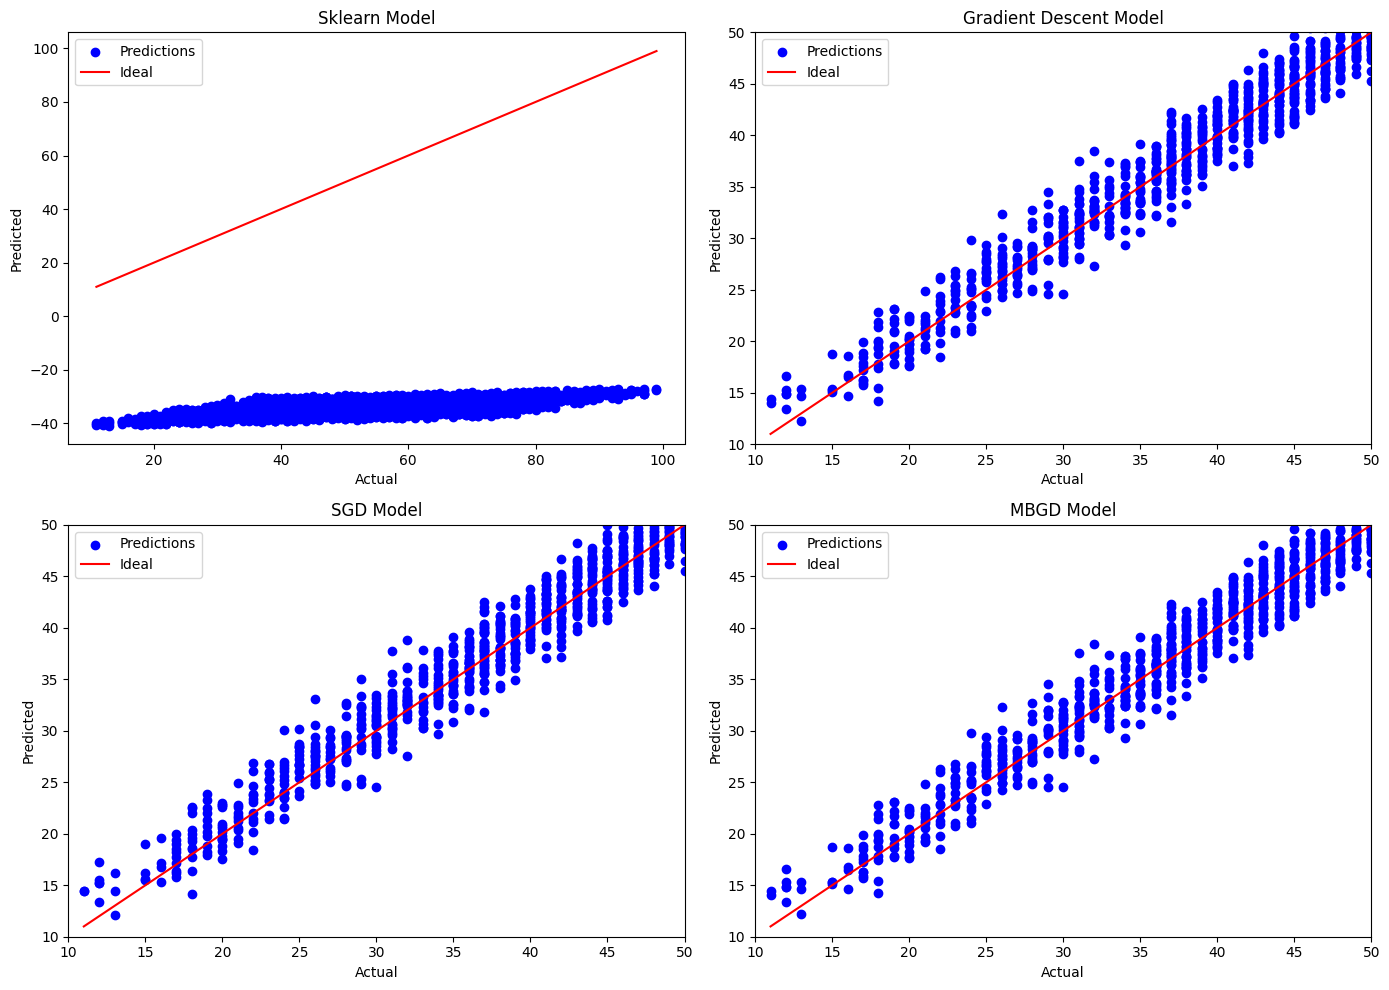

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Predictions using the sklearn model
y_pred_sklearn_train = model.predict(X_train[:, 1:])  
y_pred_sklearn_test = model.predict(X_test[:, 1:])  

# Predictions using the gradient descent model
y_pred_gd_train = X_train.dot(theta)
y_pred_gd_test = X_test.dot(theta)

# Predictions using the SGD model
y_pred_sgd_train = X_train.dot(theta_sgd)
y_pred_sgd_test = X_test.dot(theta_sgd)

# Predictions using the MBGD model
y_pred_mbgd_train = X_train.dot(theta_mbgd)
y_pred_mbgd_test = X_test.dot(theta_mbgd)

metrics = {
    "sklearn": {
        "train_mse": mean_squared_error(y_train, y_pred_sklearn_train),
        "test_mse": mean_squared_error(y_test, y_pred_sklearn_test),
        "train_r2": r2_score(y_train, y_pred_sklearn_train),
        "test_r2": r2_score(y_test, y_pred_sklearn_test)
    },
    "gradient_descent": {
        "train_mse": mean_squared_error(y_train, y_pred_gd_train),
        "test_mse": mean_squared_error(y_test, y_pred_gd_test),
        "train_r2": r2_score(y_train, y_pred_gd_train),
        "test_r2": r2_score(y_test, y_pred_gd_test)
    },
    "sgd": {
        "train_mse": mean_squared_error(y_train, y_pred_sgd_train),
        "test_mse": mean_squared_error(y_test, y_pred_sgd_test),
        "train_r2": r2_score(y_train, y_pred_sgd_train),
        "test_r2": r2_score(y_test, y_pred_sgd_test)
    },
    "mbgd": {
        "train_mse": mean_squared_error(y_train, y_pred_mbgd_train),
        "test_mse": mean_squared_error(y_test, y_pred_mbgd_test),
        "train_r2": r2_score(y_train, y_pred_mbgd_train),
        "test_r2": r2_score(y_test, y_pred_mbgd_test)
    }
}

for method, values in metrics.items():
    print(f"Method: {method}")
    for metric, value in values.items():
        print(f"{metric}: {value}")
    print()

plt.figure(figsize=(14, 10))

# Plot for sklearn model
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_sklearn_test, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal')
plt.title('Sklearn Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Plot for gradient descent model
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_gd_test, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal')
plt.title('Gradient Descent Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(10,50)
plt.ylim(10,50)
plt.legend()

# Plot for SGD model
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_sgd_test, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal')
plt.title('SGD Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(10,50)
plt.ylim(10,50)
plt.legend()

# Plot for MBGD model
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_mbgd_test, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal')
plt.title('MBGD Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(10,50)
plt.ylim(10,50)
plt.legend()

plt.tight_layout()
plt.show()

> ##### Mini-Batch Gradient Descent is performing the best on the dataset as it has the lowest MSE and highest R2 score on the test data.   